# Tensorflow SingleGPU training

In [1]:
import os

data_folder = 'datasets'
os.makedirs(data_folder, exist_ok=True)

In [2]:
import tensorflow as tf
tf.__version__

'1.10.0'

### Display examples of images

Read a few images from the training TFRecords file

In [3]:

def parse(example_proto):
    features = {'label': tf.FixedLenFeature((), tf.int64, default_value=0),
                'image': tf.FixedLenFeature((), tf.string, default_value="")}
    
    parsed_features = tf.parse_single_example(example_proto, features)
    label = parsed_features['label']
    image = image = tf.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, (224, 224, 3,))
    
    return image, label
    

files = ['aerialsmall_train.tfrecords']

dataset = tf.data.TFRecordDataset(files)
dataset = dataset.map(parse)
dataset = dataset.shuffle(1000)
iterator = dataset.make_one_shot_iterator()

images = []
labels = []
with tf.Session() as sess:
    for i in range(3):
        image, label = sess.run(iterator.get_next())
        images.append(image)
        labels.append(label)
                      
      

Display the images.

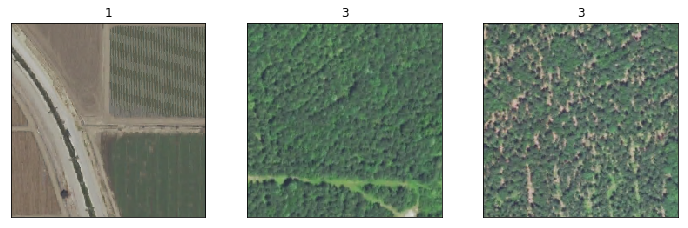

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

figsize=(10, 8)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
image
for ax, image, label in zip(axis.flat[0:], images, labels):
    ax.set_title(str(label))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)

In [54]:
from tensorflow.keras.applications import resnet50

# Returns a dataset based on a list of TFRecords files passsed as a parameters. 
def create_dataset(files, batch_size=2, train=True, buffer_size=10000):
  IMAGE_SHAPE = (224, 224, 3,)
  NUM_CLASSES = 6
  
    
  def _parse(example_proto):
      features = {'label': tf.FixedLenFeature((), tf.int64, default_value=0),
                'image': tf.FixedLenFeature((), tf.string, default_value="")}
      parsed_features = tf.parse_single_example(example_proto, features)
      label = parsed_features['label']
      #label = tf.one_hot(label, NUM_CLASSES)
      image = image = tf.decode_raw(parsed_features['image'], tf.uint8)
      image = tf.cast(image, tf.float32)
      #image = scale_image(image)
      image = tf.reshape(image, IMAGE_SHAPE)
      return image, label

  def _resnet_preprocess(images, labels):
      images = resnet50.preprocess_input(images)
      return images, labels
        
  
  dataset = tf.data.TFRecordDataset(files)
  dataset = dataset.map(_parse)
  #if train:
      #dataset = dataset.shuffle(buffer_size)
  dataset = dataset.batch(batch_size)
  dataset = dataset.map(_resnet_preprocess)
  #dataset = dataset.repeat()
  return dataset
    

In [55]:
files = ['aerialsmall_train.tfrecords']

dataset = create_dataset(files)
iterator = dataset.make_one_shot_iterator()

In [56]:
with tf.Session() as sess:
    images, labels = sess.run(iterator.get_next())
    
print(images.shape)
print(labels.shape)

(2, 224, 224, 3)
(2,)


In [57]:
print(images)

[[[[-19.939003    12.221001   -44.68      ]
   [-29.939003    -6.7789993  -56.68      ]
   [-49.939003   -35.779      -79.68      ]
   ...
   [-22.939003     1.2210007  -48.68      ]
   [-29.939003   -12.778999   -56.68      ]
   [-36.939003   -30.779      -67.68      ]]

  [[ -5.939003    30.221      -29.68      ]
   [-14.939003     9.221001   -42.68      ]
   [-34.939003   -21.779      -65.68      ]
   ...
   [-21.939003     6.2210007  -45.68      ]
   [-23.939003    -2.7789993  -51.68      ]
   [-28.939003   -15.778999   -58.68      ]]

  [[ -7.939003    33.221      -30.68      ]
   [-11.939003    17.221      -38.68      ]
   [-25.939003    -8.778999   -55.68      ]
   ...
   [-14.939003    13.221001   -40.68      ]
   [-23.939003     0.22100067 -50.68      ]
   [-32.939003   -12.778999   -60.68      ]]

  ...

  [[-27.939003    -4.7789993  -52.68      ]
   [-31.939003    -9.778999   -57.68      ]
   [-25.939003    -5.7789993  -53.68      ]
   ...
   [ 63.060997    69.221       58.3